In [12]:
!pip install seaborn

                                              0.0/293.3 kB ? eta -:--:--
     -                                        10.2/293.3 kB ? eta -:--:--
     -                                        10.2/293.3 kB ? eta -:--:--
     -------                               61.4/293.3 kB 544.7 kB/s eta 0:00:01
     -------------------------------        245.8/293.3 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 1.8 MB/s eta 0:00:00


In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Define the directory path
path = r"C:\Users\porwa\OneDrive - Georgia Institute of Technology\Desktop\GT Acad\09 Fall 2023\01 Practicum\01 Data"

# Change the directory
os.chdir(path)
print(os.getcwd())

C:\Users\porwa\OneDrive - Georgia Institute of Technology\Desktop\GT Acad\09 Fall 2023\01 Practicum\01 Data


In [27]:
df_raw = pd.read_csv('NCAAM1 22-23 shotsdf.csv')

In [28]:
columns_to_keep = [
    'Stat', 'Jumpshot', 'Assisted', 'Red Zone', 'Floater', 'Second Chance',
    'Layup', 'Paint', 'Drive', 'Blocked', 'ATO', 'Off Turnover', 'Off Steal',
    'Hook Shot', 'Fastbreak', 'Pullup', 'And1', 'Turnaround', 'Dunk', 'Step Back'
]

# Filter the DataFrame to only include these columns
df = df_raw[columns_to_keep]

In [29]:
# Separate the data into 2 pointers and 3 pointers
df_two_pointers = df[df['Stat'].isin(['TwoMake', 'TwoMiss'])]
df_three_pointers = df[df['Stat'].isin(['ThreeMake', 'ThreeMiss'])]

# Add a 'Made' column to indicate if the shot was made
df_two_pointers['Made'] = df_two_pointers['Stat'] == 'TwoMake'
df_three_pointers['Made'] = df_three_pointers['Stat'] == 'ThreeMake'


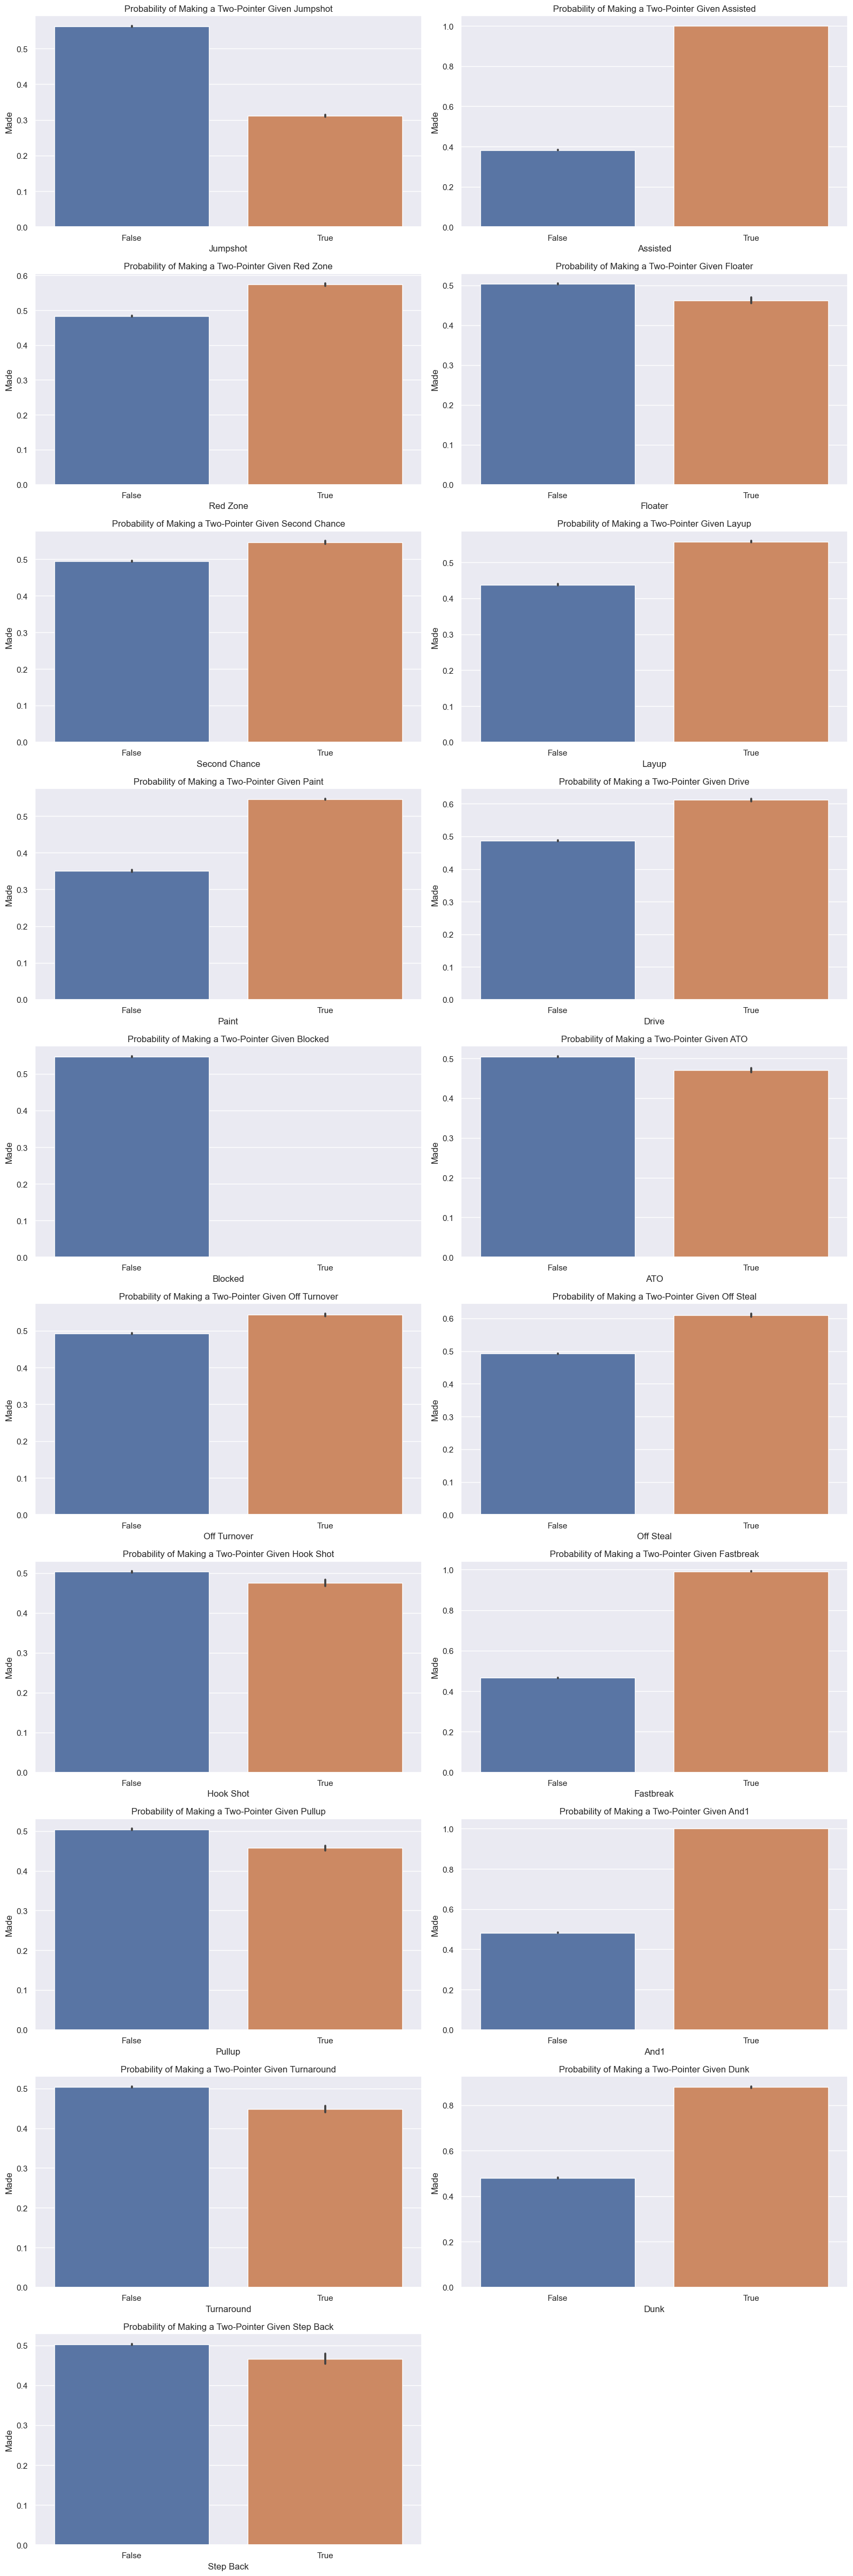

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
sns.set()

# # Loop through each column to create a bar plot for each condition
# for col in df_two_pointers.columns[1:-1]:  # Skip the 'Stat' and 'Made' columns
#     fig, ax = plt.subplots(figsize=(12, 8))  # Create a new figure and axis for each plot
#     sns.barplot(x=col, y='Made', data=df_two_pointers, ax=ax)
#     plt.title(f'Probability of Making a Two-Pointer Given {col}')
#     plt.show()

n_cols = 2

# Calculate the number of rows needed for subplots
n_rows = int(len(df_two_pointers.columns[1:-1]) / n_cols)
if len(df_two_pointers.columns[1:-1]) % n_cols:
    n_rows += 1

# Create a new figure and axis array for all subplots
fig, axarr = plt.subplots(n_rows, n_cols, figsize=(16, 48))

# Flatten the axis array for easy indexing
axarr = axarr.flatten()

# Loop through each column to create a bar plot for each condition
for idx, col in enumerate(df_two_pointers.columns[1:-1]):  # Skip the 'Stat' and 'Made' columns
    sns.barplot(x=col, y='Made', data=df_two_pointers, ax=axarr[idx])
    axarr[idx].set_title(f'Probability of Making a Two-Pointer Given {col}')

# Remove any empty subplots
for idx in range(len(df_two_pointers.columns[1:-1]), n_rows * n_cols):
    fig.delaxes(axarr[idx])

plt.tight_layout()
plt.show()


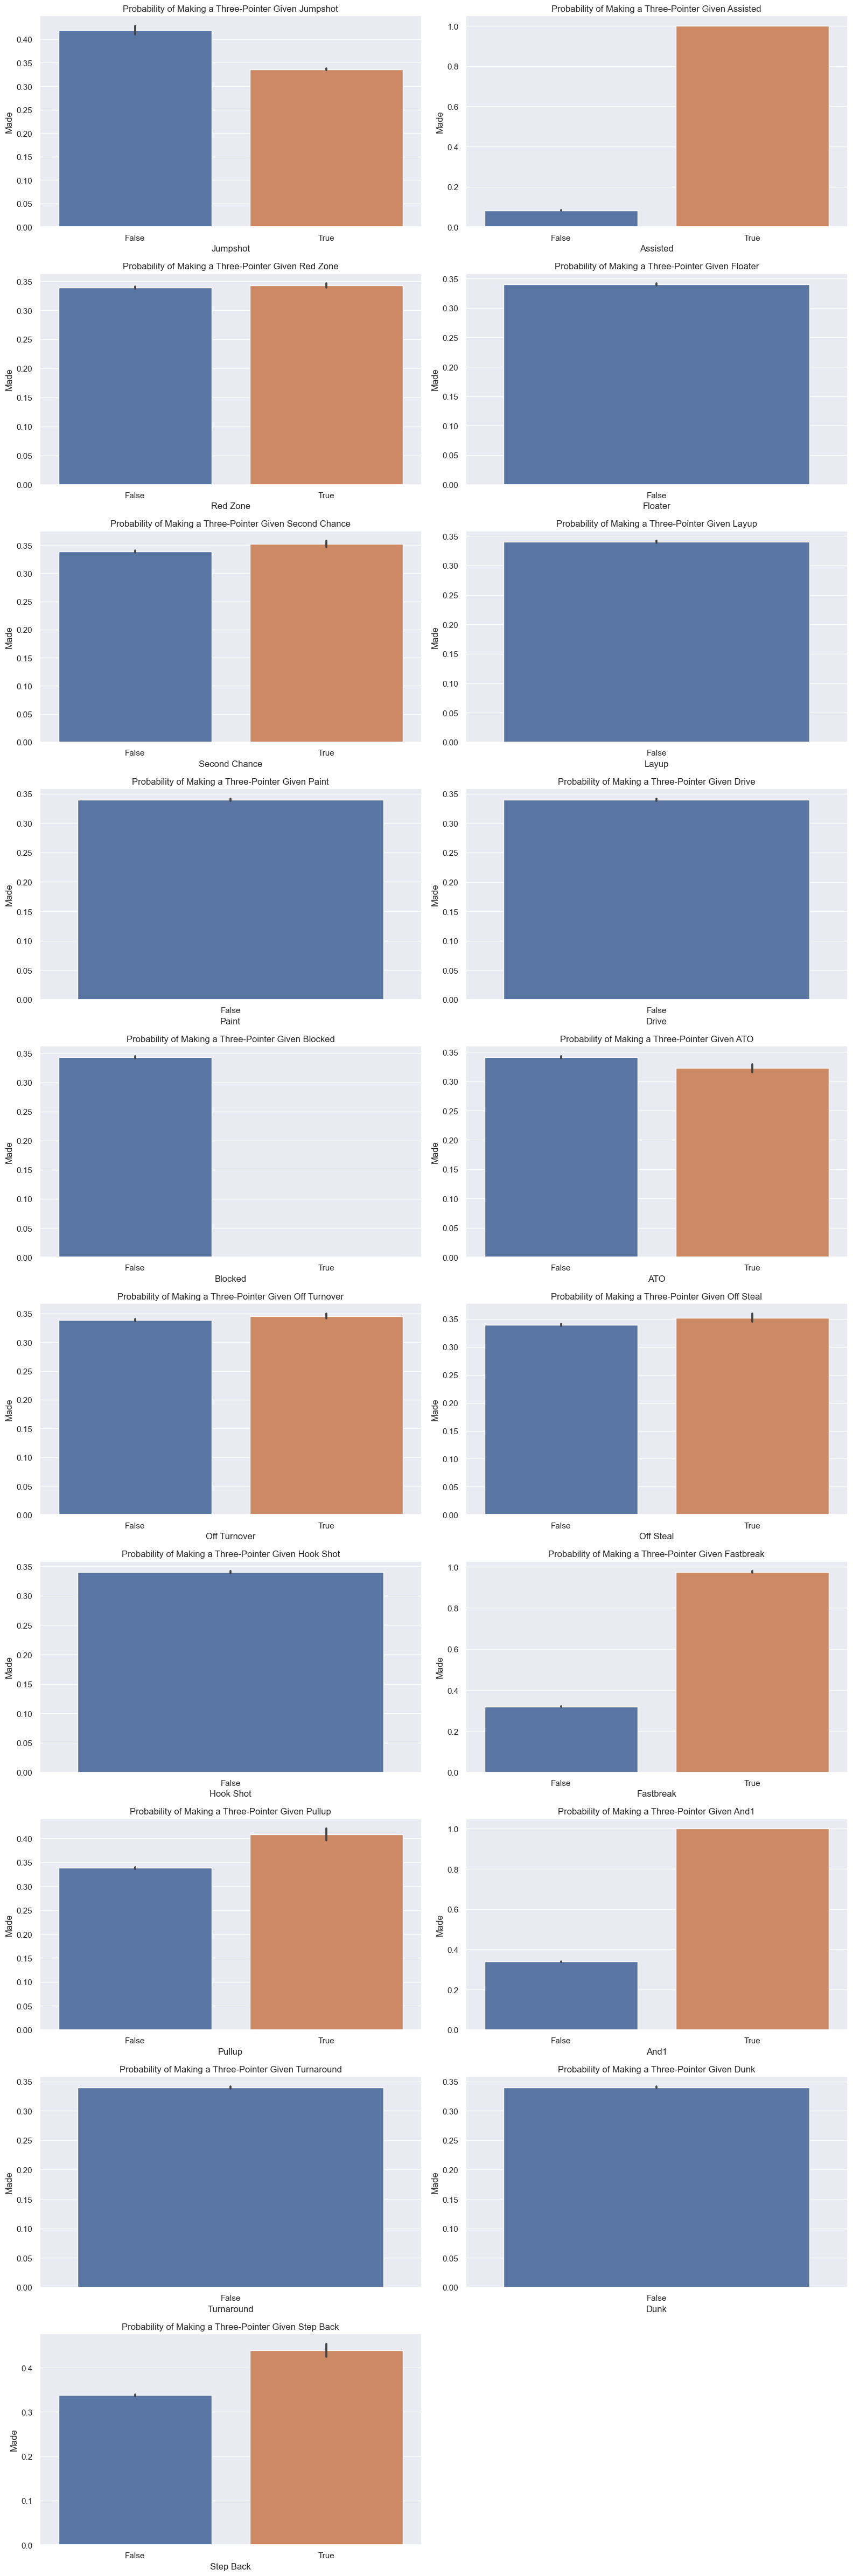

In [35]:
sns.set()

# Determine the number of columns for subplots
n_cols = 2

# Calculate the number of rows needed for subplots
n_rows = int(len(df_three_pointers.columns[1:-1]) / n_cols)
if len(df_three_pointers.columns[1:-1]) % n_cols:
    n_rows += 1

# Create a new figure and axis array for all subplots
# Adjusting the second value of figsize to make the y-axis longer
fig, axarr = plt.subplots(n_rows, n_cols, figsize=(16, 48))

# Flatten the axis array for easy indexing
axarr = axarr.flatten()

# Loop through each column to create a bar plot for each condition
for idx, col in enumerate(df_three_pointers.columns[1:-1]):  # Skip the 'Stat' and 'Made' columns
    sns.barplot(x=col, y='Made', data=df_three_pointers, ax=axarr[idx])
    axarr[idx].set_title(f'Probability of Making a Three-Pointer Given {col}')

# Remove any empty subplots
for idx in range(len(df_three_pointers.columns[1:-1]), n_rows * n_cols):
    fig.delaxes(axarr[idx])

plt.tight_layout()
plt.show()